
<h1> <center> ENSF 519.01 Applied Data Scince </center></h1>
<h2> <center> Term Test - Oct 23, 2019 </center></h2>
<h2> <center> 100 marks - 2 hours </center></h2>


`Your Full Name:` Sadat Islam

`Your Student ID:` 10171897

# Question 1 (30 pts)

To answer this question you need to use a text file called `medium.txt`, which contains a number of articles from the medium.com website. In this question, you will first find all the `numbers` in the text, then check the distribution of `last digits` of the the numbers, over the text. Complete the code below to implement the following tasks:

1. Read the whole text file into a single string.
2. Use a regular expression to find all the numbers (numbers may have "," like 100,000 or fraction like 13.5. you keep a clean version without comma and drop the fraction and decimal point like 100000 and 13 for the example above.
3. Use `map` and a proper `lambda` expression to extract all the `last digits` (the rightmost digit) of all numbers as a list of integers. To give you an example, after applying the `map` on `['168', '54', '1000', '89']` you should get back `[8, 4, 0, 9]`. Note the data types!
4. Use proper numpy methods to count number of occurences of each digit.
5. Plot a bar chart showing how many numbers end with each digit.

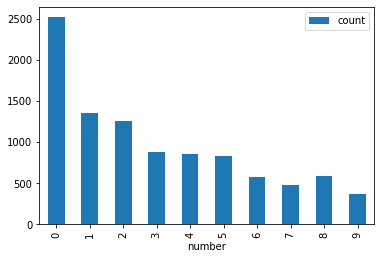

In [155]:
import re
import numpy as np
import pandas as pd

def read_file(filename):
    """
    Open and read the contents of the given file. 
    Return the contents as a string. 
    Don't forget to properly close the file.
    """
    file = open(filename, "r")
    bookString = file.read()
    
    return bookString

# FIX
def find_all_numbers(text):
    """
    Using a regular expression find all the numbers in the given text
    """
    numbers = re.findall('\d+(?:,\d+)?', text)
    numbers = list(map(lambda number: number.replace(',', ''), numbers))
    
    return numbers

def get_last_digits(numbers_list):
    """ 
    Use `map` to get a list of rightmost digits in the input list. 
    Input type is a list of strings, the output should be a list of ints.
    """
    rv = list(map(lambda number: int(number[-1]), numbers_list))
    
    return rv
    
def count_digits_in_list(l):
    """
    Use proper numpy methods for counting the frequency of each item in the input list.
    If the list is something like [2, 4, 4, 4, 6, 6, 6, 6, 6], the output will be something like:
    {2: 1, 4: 3, 6: 5}, but not necesserily as a dictionary, though. You're free to return the results in 
    any data format that suits your solution.
    """
    unique, counts = np.unique(l, return_counts=True)
    rv = {'number': unique, 'count': counts}    
    return rv

def plot_bar_chart(last_digit_counts):
    """
    The input has the same type as the output of count_digits_in_list. No return statement is necessary.
    """
    
    df = pd.DataFrame(last_digit_counts)
    df = df.set_index(df['number']).drop(columns='number') 
    df.plot.bar()
    pass
    

text = read_file('medium.txt')
all_numbers = find_all_numbers(text)
#print(all_numbers)
last_digits = get_last_digits(all_numbers)
#print(last_digits)
last_digit_counts = count_digits_in_list(last_digits)
#print(last_digit_counts)
plot_bar_chart(last_digit_counts)

# Question 2 (40 pts)

Best non-fiction books of 2018 based on the good reads users votes can be found on this page: https://www.goodreads.com/choiceawards/best-nonfiction-books-2018

1. Here is the code that downloadds the page html content and makes a beautiful soup parser on it. Note that we have copied the file in a different domain to avoid potential IP blocking.


In [156]:
import requests
from bs4 import BeautifulSoup
import re

page_html = requests.get('https://sea-lab.github.io/best-nonfiction-books-2018.html').text
parser = BeautifulSoup(page_html, 'html.parser')

1. There are 20 blocks in the page showing the top 20 nominated books in the category. Find them using beautiful soup and loop over them to find:
    1. The number of votes using RegEx, don't forget to convert it to an `int`.
    2. Name of the book
    3. The author name
2. Store these three pieces of information in a pandas dataframe
3. Add a column to the dataframe that stores the genre. The code that extracts the genre name from the page is already included.

In [157]:
def extract_books_info(parser):
    """
    Get the page parser and find all the books
    """
    num_votes = []
    authors = []
    book_names = []
    
    genre_name = parser.find('div', class_='gcaMastheader').get_text()[len('Best '):]
    
    polls = parser.find_all("div", {"class": "pollAnswer"})
    
    for poll in polls:
        vote_str = poll.contents[1].text
        vote_str = re.findall('[0-9,]+', vote_str)[0]
        vote_num = int(vote_str.replace(',', ''))
        num_votes.append(vote_num)
        
        title_name_str = poll.contents[3].contents[1].contents[1].contents[0].get('title')
        title, author = re.findall('(.+) by (.+)', title_name_str)[0]
        authors.append(author.strip())
        book_names.append(title.strip())
        
    data = {'Title': book_names, 'Author': authors, 'Votes': num_votes}
    rv = pd.DataFrame(data)
    rv['Genre'] = genre_name
    
    return rv  # 

nonfiction = extract_books_info(parser)
nonfiction

,Title,Author,Votes,Genre
0,I'll Be Gone in the Dark,Michelle McNamara,46472,Nonfiction
1,"Girl, Wash Your Face",Rachel Hollis,40383,Nonfiction
2,Fear,Bob Woodward,26803,Nonfiction
3,Whiskey in a Teacup,Reese Witherspoon,21108,Nonfiction
4,The Library Book,Susan Orlean,19857,Nonfiction
5,21 Lessons for the 21st Century,Yuval Noah Harari,16541,Nonfiction
6,Not That Bad,Roxane Gay,16043,Nonfiction
7,So You Want to Talk About Race,Ijeoma Oluo,15254,Nonfiction
8,12 Rules for Life,Jordan B. Peterson,11707,Nonfiction
9,Factfulness,Hans Rosling,9668,Nonfiction


Now read a similar dataframe from a csv file (fiction_books.csv) for top 20 fiction books. Then

1. Append the dataframes together (the result will have the same 4 columns, and 40 rows - and indexed from 0 to 39)

2. Sort it by #votes

In [158]:
fiction = pd.read_csv('fiction_books.csv')

combined = pd.concat([fiction, nonfiction], ignore_index='true')
combined = combined.sort_values('Votes', ascending=False)
combined = combined.reset_index(drop=True)
combined

,Title,Author,Votes,Genre
0,Still Me,Jojo Moyes,55300,Fiction
1,I'll Be Gone in the Dark,Michelle McNamara,46472,Nonfiction
2,An American Marriage,Tayari Jones,41826,Fiction
3,"Girl, Wash Your Face",Rachel Hollis,40383,Nonfiction
4,Us Against You,Fredrik Backman,38981,Fiction
5,Nine Perfect Strangers,Liane Moriarty,31447,Fiction
6,Fear,Bob Woodward,26803,Nonfiction
7,An Absolutely Remarkable Thing,Hank Green,24363,Fiction
8,Killing Commendatore,Haruki Murakami,23695,Fiction
9,Whiskey in a Teacup,Reese Witherspoon,21108,Nonfiction


Using pandas `groupby` and aggregation on the combined dataframe find the total number of votes for each genre. Then plot a bar chart with just two columns showing the number of votes for each genre.

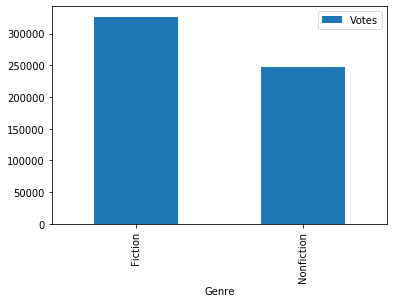

In [159]:
# Your solution
df = combined.groupby('Genre').aggregate({'Votes':'sum'})
df.plot.bar()

# Question 3 (30 pts)


Read the attached csv file (auto-mpg-cleaned.csv) that contains information about a number of car models. Split it into features and target columns. The target column is `mpg` and there are 7 features.

In [160]:
# Your code
source_file = 'auto-mpg-cleaned.csv'
data = pd.read_csv(source_file)

features = data.drop(columns='mpg')
labels = data['mpg']
print(target.shape)  # Expected (392, )
features

(392,)


,Unnamed: 0,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
5,5,8.0,429.0,198.0,4341.0,10.0,70.0,1.0
6,6,8.0,454.0,220.0,4354.0,9.0,70.0,1.0
7,7,8.0,440.0,215.0,4312.0,8.5,70.0,1.0
8,8,8.0,455.0,225.0,4425.0,10.0,70.0,1.0
9,9,8.0,390.0,190.0,3850.0,8.5,70.0,1.0


Apply a linear regresson model 50 times each with a different train-test split (test_size=0.25, random states: [1, 50)). Report the average score on the training and test sets, over these 50 models.

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

lr_train_scores = []
lr_test_scores = []
for i in range(1, 50):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=i)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    lr_train_scores.append(lr.score(X_train, y_train))
    lr_test_scores.append(lr.score(X_test, y_test))


train_mean_score = np.mean(lr_train_scores)
test_mean_score = np.mean(lr_test_scores)
print(f'Train={train_mean_score:.6}\tTest={test_mean_score:.6}')

Train=0.824889	Test=0.805142


Now apply a Lasso regularizatoin with 7 values of alpha: `[0.001, 0.01, 0.1, 1.0, 10., 100., 1000.]`. For each alpha use integers in [1, 50) as the train-test split's random state. Report the average score on the training and test sets per alpha. Explain where the sweet spot is with respect to over-fitting and under-fitting tradeoff.

In [162]:
from sklearn.linear_model import Lasso

for alpha in [0.001, 0.01, 0.1, 1.0, 10., 100., 1000.]:
    # Your code
    lasso_train_scores = []
    lasso_test_scores = []
    for i in range(1, 50):
        X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=i)

        lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
        
        training_score = lasso.score(X_train, y_train)
        test_score = lasso.score(X_test, y_test)
        
        lasso_train_scores.append(training_score)
        lasso_test_scores.append(test_score)
    
    train_mean_score = np.mean(lasso_train_scores)
    test_mean_score = np.mean(lasso_test_scores)
    
    print(f'LA ⍺={alpha:.5}\tTrain={train_mean_score:.6}\tTest={test_mean_score:.6}')

LA ⍺=0.001	Train=0.824888	Test=0.805151
LA ⍺=0.01	Train=0.824853	Test=0.805198
LA ⍺=0.1	Train=0.821813	Test=0.803563
LA ⍺=1.0	Train=0.807645	Test=0.795649
LA ⍺=10.0	Train=0.806779	Test=0.797523
LA ⍺=100.0	Train=0.793639	Test=0.783977
LA ⍺=1000.0	Train=0.669651	Test=0.661691


In [4]:
# explain your answer here:

#The sweet spot is at alpha=0.01 as this is the point where the model starts to increase in errors on the Test set